In [1]:
"""
[Decision Tree Classifier]
Corncerned about iterpretability. Split data by features, and gain the biggest information gain (IG).
It's better to trim decision tree than having a big one.

Information gain:
The objective is to get a maximum of IG in every split. Objectiv efunction is to maxmize IG.
IG(Dp, f) = I(Dp) - Sum[from j = 1 to m]{(Nj/Np) * I(Dj)}
    f : the node to split features.
    Dp : The parent node.
    Dj : The jth child node.
    I : Impurity measure or splitting criteria.
    Np : # of samples in the parent node.
    Np : # of samples in the jth child node.
    => Binary decision tree:
        IG(Dp, f) = I(Dp) - (Nleft/Np) * I(Dleft) - (Nright/Np) * I(Dright)
        The common impurity measures in binary decision tree are Gini impurity (Ig), Entropy (Ih) and Classification error (Ie).
        1. Ih for all non-empty(p(i|t) not = 0):
           Ih(t) = -Sum[from i = 1 to c]{p(i|t)log[2](p(i|t))}
           p(i|t) : The portion of samples of class i in the node t.
           If all samples in a node are the same class, Ih = 0. In uniform distribution, the Ih will be the max.
           Entropy is to maximize the mutual information in nodes.
        2. Ig is minimizing classification error:
           Ig = Sum[from i = 1 to c]{p(i|t) * (1 - p(i|t))} = 1 - Sum[from i = 1 to c]{p(i|t) ^ 2}
           If there is perfect mixture of class exist, Ig will be the biggest.
           It will produce similar result with Ih. So it's meaningless to try different impurity measures, instead we should try different
           cut-off values.
        3. Ie:
           Ie = 1 - max{p(i|t)}

Random forest:
Combine several decision trees to a ensemble.
Ensemble learning is combine several weak learner to build a robust mode -- strong leaerner.
Robust model has lower generalization error and not likely to overfit.
Steps:
    1. Define size n random bootstrap sample w/ replacement (Will put back after be sampled)
    2. Get decision tree from bootstrap sample. To every nodes:
        a. Random choose d features w/ non-replacement (Won't put back after be sampled)
        b. Use that features to split the node, optimize with objective fucntion
    3. Repeat 1. & 2. for k times.
    4. Combine all decision tree prediction, using majority voting to decide labels.
    * The k is very important, bigger k have more secision tree and better performance but cost a lot.
    * The n can control bias-variance, bigger n will more likely overfitting, small n will have better performance, but very slow.
    * d = sqrt(m) in scikit-learn, m is # of features.
We don't need to trim random forest because it's robust.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from subprocess import call
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from shared import Plot

In [2]:
# 3 impurity measures
def gini(p):
    """
    Gini impurity
    
    Parameter:
    p : The probabilities of class 1
    
    Return:
    Ig : Gini impurity
    """
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    """
    Entropy
    
    Parameter:
    p : The probabilities of class 1
    
    Return:
    Ig : Entropy
    """
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p):
    """
    Classification error
    
    Parameter:
    p : The probabilities of class 1
    
    Return:
    Ig : Classification error
    """
    return 1 - np.max([p, 1 - p])

In [3]:
# Get data
x = np.arange(0.0, 1.0, 0.01)

In [4]:
# Entropy & entropy w/ scaled
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]

In [5]:
# Classification error
err = [error(i) for i in x]

In [6]:
# Gini impurity
g = gini(x)

Compare impurity measures...


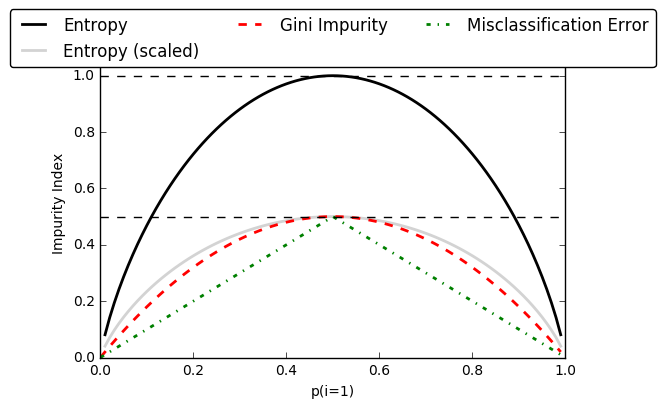

In [7]:
# Plot impurity measures
print('Compare impurity measures...')
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, g, err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [8]:
# Get Iris data
"""
Features:
0 => sepal length in cm
1 => sepal width in cm
2 => petal length in cm
3 => petal width in cm


Target labels:
1 => Iris-Setosa
2 => Iris-Versicolor
3 => Iris-Virginica
"""
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [9]:
# Get training & test data
"""
Settings:
30 % for test, 70 % for training
"""
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [10]:
# Decision tree classifier w/ entropy
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Plot results...


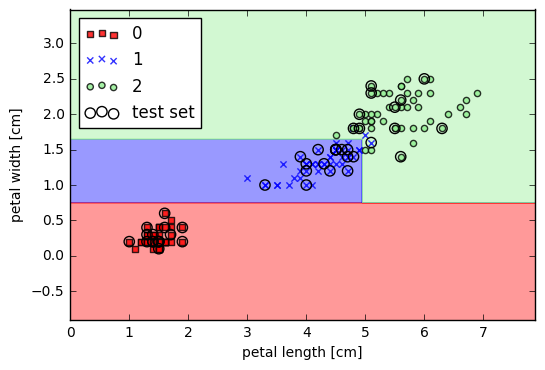

In [11]:
# Plot results
print('Plot results...')
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined, y=y_combined,
                           classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

Plot decision tree...


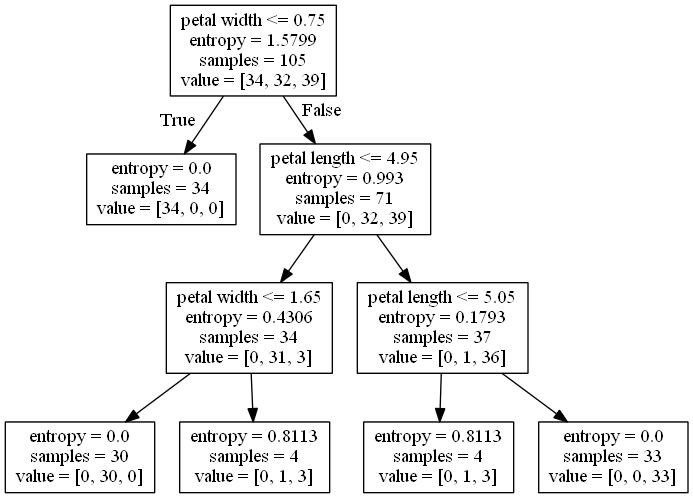

In [12]:
# Plot decision tree
print('Plot decision tree...')
export_graphviz(tree, out_file='img/tree.dot', feature_names=['petal length', 'petal width'])

# Execute shell command to generate image
!dot -Tpng ./img/tree.dot -o ./img/tree.png

# IPython show image
Image(filename='img/tree.png') 

In [13]:
# Random Forest Classifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

Plot results...


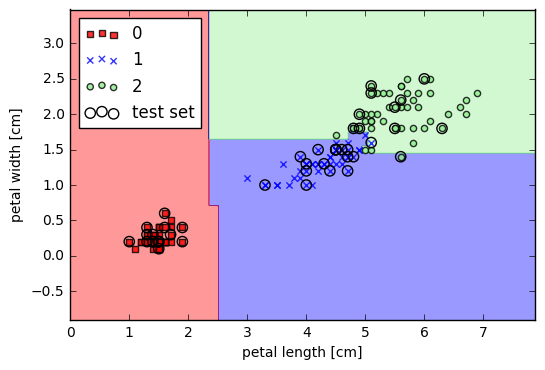

In [14]:
# Plot results
print('Plot results...')
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined, y=y_combined,
                           classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()